<a href="https://colab.research.google.com/github/isikaykarakus/BloodMNIST_C4/blob/main/Isikay_Karakus_C4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ROADMAP (64x64 First)
Here’s a structured roadmap to ensure you're on track:

📦 PHASE 1 – DATASET PREPARATION (64x64)
 Download dataset

 Normalize or standardize

 Visualize samples

 Balance the training set (oversample minority classes)

 Augment the dataset using tf.data

🧱 PHASE 2 – BASELINE CNN MODEL
 Build a clean CNN from scratch (3 conv blocks)

 Compile and train with:

EarlyStopping

Class weights

Augmented + balanced dataset

 Evaluate on test set

 Report:

Accuracy, Precision, Recall, F1-score

Confusion Matrix

Training curves

🔄 PHASE 3 – IMPROVEMENT (Still 64x64)
Here you improve performance by experimenting with:

⬆️ Increasing model depth (add more conv layers, or use larger filters).

🧠 Adding attention-like mechanisms (e.g., SE block).

🧪 Try a different regularization strategy (e.g., weight decay instead of Dropout).

🔢 Adjust batch size, learning rate, optimizer.

🧭 PHASE 4 – SWITCH TO 128x128
Once you finalize your 64x64 pipeline:

🔁 Apply same preprocessing (standardization, balancing, augmentation).

🔁 Update model input size to (128, 128, 3).

🔄 Retrain and compare results.

📊 PHASE 5 – FINAL ANALYSIS
✍️ Compare 64x64 vs 128x128:

Performance (metrics)

Time/memory usage

📋 Prepare your report

🎤 Prepare your slides



## Step 1: Download BloodMNIST 64x64 Dataset

In [1]:
!pip install --upgrade tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 131.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 130.4 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have te

In [2]:
!wget https://zenodo.org/records/10519652/files/bloodmnist_64.npz?download=1 -O bloodmnist_64.npz


--2025-06-02 09:41:57--  https://zenodo.org/records/10519652/files/bloodmnist_64.npz?download=1
Resolving zenodo.org (zenodo.org)... 188.185.48.194, 188.185.45.92, 188.185.43.25, ...
Connecting to zenodo.org (zenodo.org)|188.185.48.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156251765 (149M) [application/octet-stream]
Saving to: ‘bloodmnist_64.npz’

bloodmnist_64.npz   100%[===================>] 149.01M  20.0MB/s    in 9.0s    

2025-06-02 09:42:07 (16.6 MB/s) - ‘bloodmnist_64.npz’ saved [156251765/156251765]



## Step 2: Load and Normalize Dataset

In [3]:
import numpy as np

# Load the 64x64 dataset
data_64 = np.load("bloodmnist_64.npz")

# Normalize and flatten labels
X_train_64 = data_64['train_images'] / 255.0
X_val_64   = data_64['val_images'] / 255.0
X_test_64  = data_64['test_images'] / 255.0
y_train_64 = data_64['train_labels'].astype(np.int32).flatten()
y_val_64   = data_64['val_labels'].astype(np.int32).flatten()
y_test_64  = data_64['test_labels'].astype(np.int32).flatten()

print(f"Train: {X_train_64.shape}, Val: {X_val_64.shape}, Test: {X_test_64.shape}")


Train: (11959, 64, 64, 3), Val: (1712, 64, 64, 3), Test: (3421, 64, 64, 3)


## Step 3: Visualize Sample Images

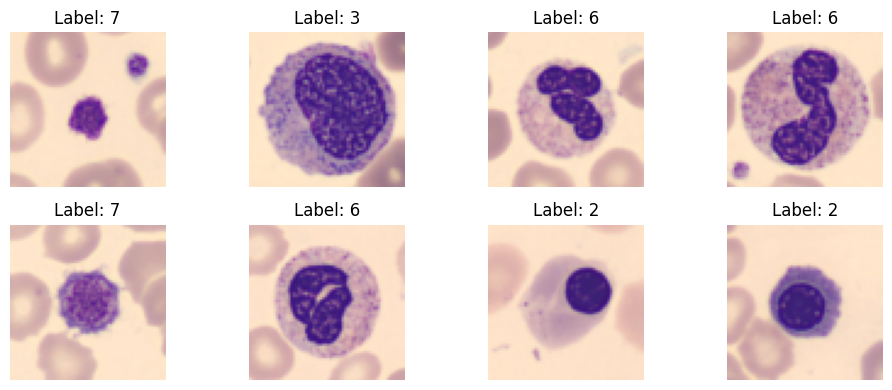

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(X_train_64[i])
    plt.title(f"Label: {y_train_64[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


## Step 4: Build and Compile Baseline CNN

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

def build_baseline_cnn(input_shape=(64, 64, 3), num_classes=8):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = build_baseline_cnn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,143,880 (4.36 MB)

 Trainable params: 1,143,432 (4.36 MB)

 Non-trainable params: 448 (1.75 KB)

## Step 5: Train the Model

In [6]:
early_stop = callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(
    X_train_64, y_train_64,
    validation_data=(X_val_64, y_val_64),
    epochs=30,
    batch_size=64,
    callbacks=[early_stop]
)


Epoch 1/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - accuracy: 0.3613 - loss: 2.2305 - val_accuracy: 0.0905 - val_loss: 28.5926
Epoch 2/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6254 - loss: 0.9713 - val_accuracy: 0.2062 - val_loss: 23.3177
Epoch 3/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7377 - loss: 0.6590 - val_accuracy: 0.3277 - val_loss: 8.2571
Epoch 4/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8109 - loss: 0.5083 - val_accuracy: 0.6600 - val_loss: 1.4619
Epoch 5/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8454 - loss: 0.4146 - val_accuracy: 0.6314 - val_loss: 2.7378
Epoch 6/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8815 - loss: 0.3351 - val_accuracy: 0.7839 - val_loss: 1.5964
Epoch 7/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8891 - loss: 0.3039 - val_accuracy: 0.7290 - val_loss: 0.9376
Epoch 8/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9111 - loss: 0.2738 - val_accuracy

## Step 6: Plot Training History

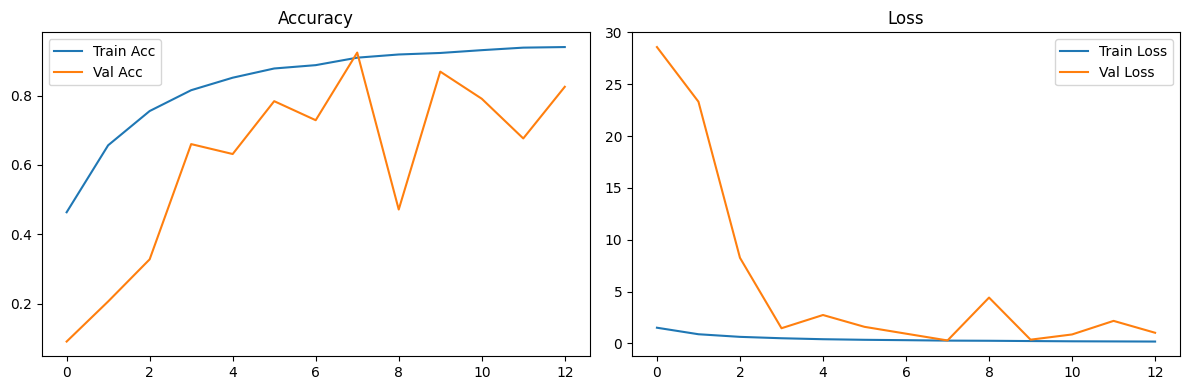

In [7]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()


## Step 7: Evaluate the Model on Test Set

In [8]:
test_loss, test_acc = model.evaluate(X_test_64, y_test_64)
print(f"Test Accuracy: {test_acc:.4f}")


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9127 - loss: 0.3038
Test Accuracy: 0.9220


## Step 8: Confusion Matrix & Classification Report

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       244
           1       1.00      0.97      0.99       624
           2       0.78      0.96      0.86       311
           3       0.88      0.85      0.87       579
           4       0.99      0.64      0.78       243
           5       0.84      0.89      0.87       284
           6       0.94      0.97      0.96       666
           7       0.99      1.00      0.99       470

    accuracy                           0.92      3421
   macro avg       0.92      0.90      0.90      3421
weighted avg       0.93      0.92      0.92      3421



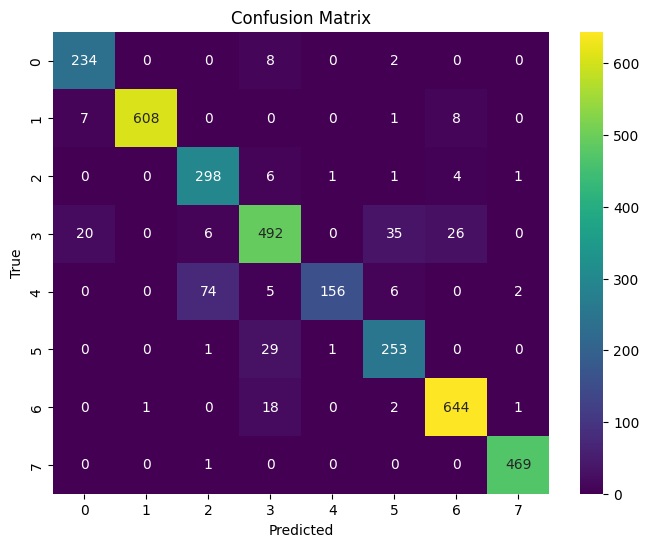

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test_64).argmax(axis=1)
print(classification_report(y_test_64, y_pred))

conf_matrix = confusion_matrix(y_test_64, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# BASELINE FOR 128

In [10]:
# Download dataset
!wget https://zenodo.org/records/10519652/files/bloodmnist_128.npz?download=1 -O bloodmnist_128.npz


--2025-06-02 09:43:01--  https://zenodo.org/records/10519652/files/bloodmnist_128.npz?download=1
Resolving zenodo.org (zenodo.org)... 188.185.48.194, 188.185.45.92, 188.185.43.25, ...
Connecting to zenodo.org (zenodo.org)|188.185.48.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 569072780 (543M) [application/octet-stream]
Saving to: ‘bloodmnist_128.npz’

bloodmnist_128.npz  100%[===================>] 542.71M  18.3MB/s    in 33s     

2025-06-02 09:43:34 (16.6 MB/s) - ‘bloodmnist_128.npz’ saved [569072780/569072780]



In [11]:
import numpy as np

# Load data
data_128 = np.load("bloodmnist_128.npz")
X_train_128 = data_128['train_images'] / 255.0
X_val_128   = data_128['val_images'] / 255.0
X_test_128  = data_128['test_images'] / 255.0

y_train_128 = data_128['train_labels'].astype(np.int32).flatten()
y_val_128   = data_128['val_labels'].astype(np.int32).flatten()
y_test_128  = data_128['test_labels'].astype(np.int32).flatten()

print(f"Train: {X_train_128.shape}, Val: {X_val_128.shape}, Test: {X_test_128.shape}")


Train: (11959, 128, 128, 3), Val: (1712, 128, 128, 3), Test: (3421, 128, 128, 3)


In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_baseline_cnn(input_shape=(128, 128, 3), num_classes=8):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model_128 = build_baseline_cnn()
model_128.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_128.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289,608 (16.36 MB)

 Trainable params: 4,289,160 (16.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(patience=5, restore_best_weights=True)

history_128 = model_128.fit(
    X_train_128, y_train_128,
    validation_data=(X_val_128, y_val_128),
    epochs=30,
    batch_size=64,
    callbacks=[early_stop]
)


Epoch 1/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 25s 86ms/step - accuracy: 0.4595 - loss: 3.0292 - val_accuracy: 0.0835 - val_loss: 47.5181
Epoch 2/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.6628 - loss: 0.9308 - val_accuracy: 0.0835 - val_loss: 65.7614
Epoch 3/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.7590 - loss: 0.6840 - val_accuracy: 0.4702 - val_loss: 4.5764
Epoch 4/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.7803 - loss: 0.6326 - val_accuracy: 0.7669 - val_loss: 0.7047
Epoch 5/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.8067 - loss: 0.5344 - val_accuracy: 0.5199 - val_loss: 2.2419
Epoch 6/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.8209 - loss: 0.4996 - val_accuracy: 0.3020 - val_loss: 21.8631
Epoch 7/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.8539 - loss: 0.4217 - val_accuracy: 0.7512 - val_loss: 1.0981
Epoch 8/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.8700 - loss: 0.3831 - val_

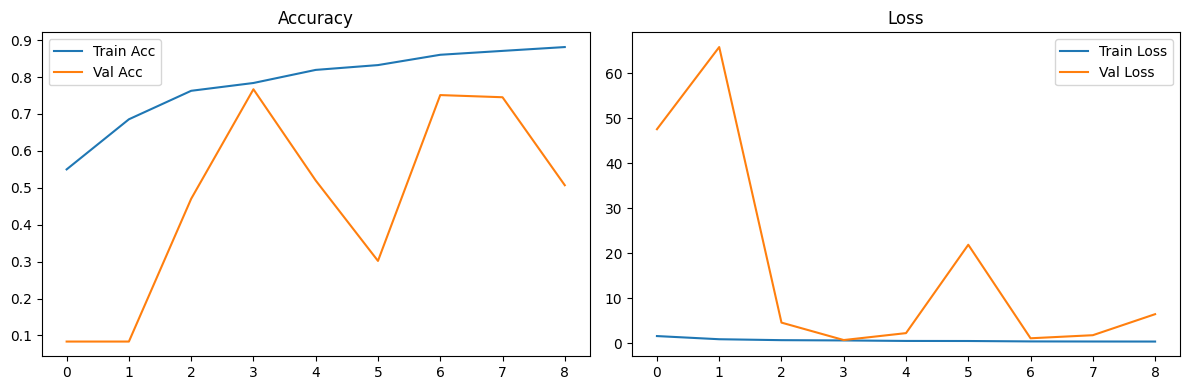

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_128.history['accuracy'], label='Train Acc')
plt.plot(history_128.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_128.history['loss'], label='Train Loss')
plt.plot(history_128.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()


In [15]:
test_loss_128, test_acc_128 = model_128.evaluate(X_test_128, y_test_128)
print(f"Test Accuracy: {test_acc_128:.4f}")


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7467 - loss: 0.7886
Test Accuracy: 0.7568


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
              precision    recall  f1-score   support

           0       0.70      0.59      0.64       244
           1       0.93      0.76      0.84       624
           2       0.86      0.63      0.73       311
           3       0.54      0.44      0.48       579
           4       0.87      0.71      0.78       243
           5       0.57      0.86      0.69       284
           6       0.76      0.97      0.85       666
           7       0.86      0.97      0.91       470

    accuracy                           0.76      3421
   macro avg       0.76      0.74      0.74      3421
weighted avg       0.76      0.76      0.75      3421



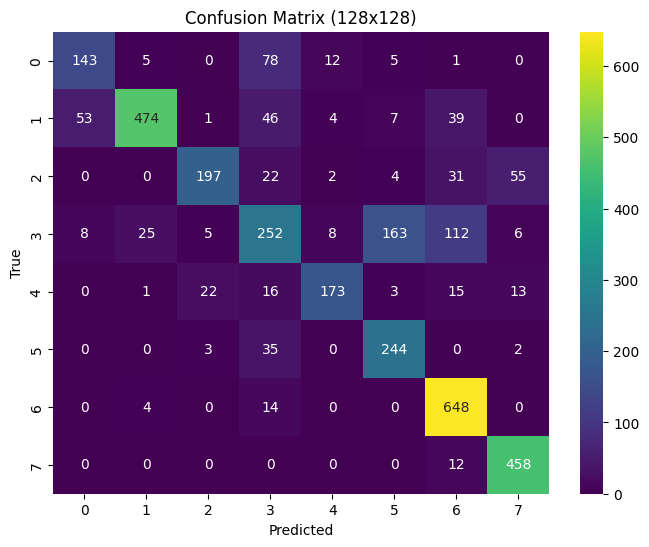

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred_128 = model_128.predict(X_test_128).argmax(axis=1)
print(classification_report(y_test_128, y_pred_128))

conf_matrix_128 = confusion_matrix(y_test_128, y_pred_128)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_128, annot=True, fmt="d", cmap="viridis")
plt.title("Confusion Matrix (128x128)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


with the baseline cnn this accurcies now we gonna improve the cnn architecture a bit and add some additional features to improve the accurcy

Here is how to add data augmentation to your 128×128 baseline CNN model. This version keeps your architecture exactly the same but adds augmentation only during training using ImageDataGenerator.



In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=5,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.05,
    horizontal_flip=True
)


# Fit generator to training data
datagen.fit(X_train_128)


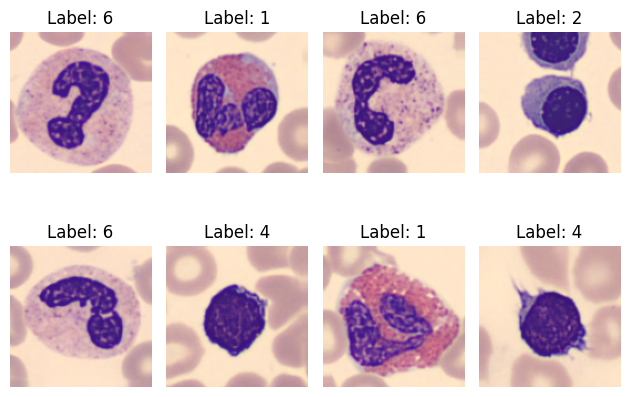

In [18]:
for X_batch, y_batch in datagen.flow(X_train_128, y_train_128, batch_size=8):
    for i in range(8):
        plt.subplot(2, 4, i + 1)
        plt.imshow(X_batch[i])
        plt.title(f"Label: {y_batch[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    break


In [19]:
from tensorflow.keras import layers, models, callbacks

def build_baseline_cnn(input_shape=(128, 128, 3), num_classes=8):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Instantiate and compile
model_aug = build_baseline_cnn()
model_aug.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_aug.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289,608 (16.36 MB)

 Trainable params: 4,289,160 (16.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [20]:
from tensorflow.keras import callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator

early_stop = callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history_aug = model_aug.fit(
    datagen.flow(X_train_128, y_train_128, batch_size=64),
    validation_data=(X_val_128, y_val_128),
    epochs=30,
    callbacks=[early_stop]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 251ms/step - accuracy: 0.3631 - loss: 3.3958 - val_accuracy: 0.1945 - val_loss: 79.3326
Epoch 2/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 40s 213ms/step - accuracy: 0.5413 - loss: 1.1773 - val_accuracy: 0.1945 - val_loss: 66.8448
Epoch 3/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 40s 213ms/step - accuracy: 0.5798 - loss: 1.0536 - val_accuracy: 0.4393 - val_loss: 9.4623
Epoch 4/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 40s 213ms/step - accuracy: 0.6762 - loss: 0.8229 - val_accuracy: 0.6443 - val_loss: 1.4525
Epoch 5/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 40s 212ms/step - accuracy: 0.7261 - loss: 0.7175 - val_accuracy: 0.7202 - val_loss: 1.0040
Epoch 6/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 40s 212ms/step - accuracy: 0.7681 - loss: 0.6210 - val_accuracy: 0.7833 - val_loss: 0.6726
Epoch 7/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 40s 211ms/step - accuracy: 0.7982 - loss: 0.5547 - val_accuracy: 0.6227 - val_loss: 2.0997
Epoch 8/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 40s 213ms/step - accuracy: 0.8240 - loss:

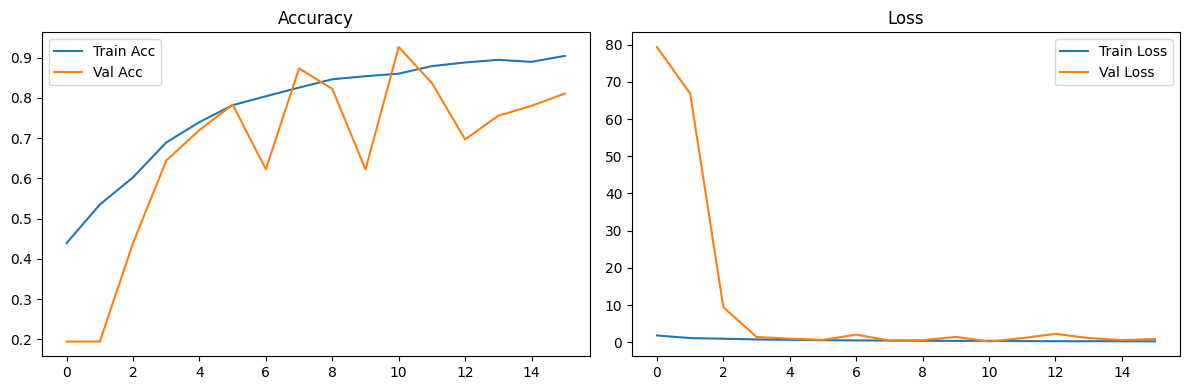

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_aug.history['accuracy'], label='Train Acc')
plt.plot(history_aug.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_aug.history['loss'], label='Train Loss')
plt.plot(history_aug.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()


In [22]:
test_loss_128, test_acc_128 = model_aug.evaluate(X_test_128, y_test_128)
print(f"Test Accuracy: {test_acc_128:.4f}")

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9286 - loss: 0.2604
Test Accuracy: 0.9354


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       244
           1       1.00      1.00      1.00       624
           2       0.99      0.89      0.94       311
           3       0.82      0.91      0.86       579
           4       0.93      0.91      0.92       243
           5       0.83      0.83      0.83       284
           6       0.97      0.93      0.95       666
           7       0.99      1.00      0.99       470

    accuracy                           0.94      3421
   macro avg       0.93      0.93      0.93      3421
weighted avg       0.94      0.94      0.94      3421



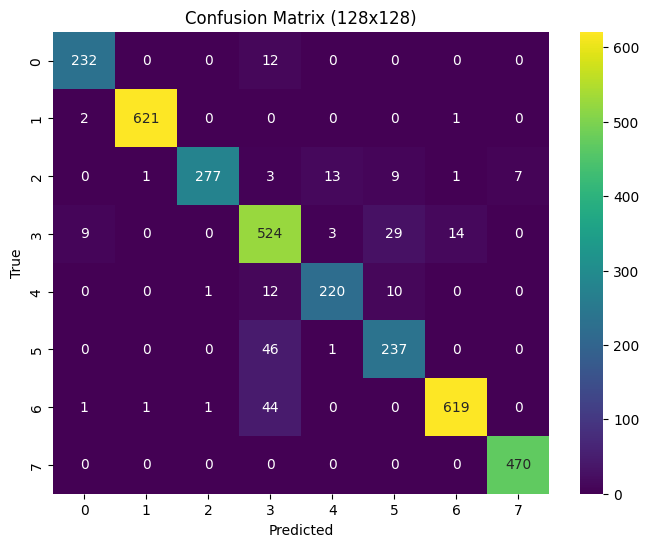

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred_128 = model_aug.predict(X_test_128).argmax(axis=1)
print(classification_report(y_test_128, y_pred_128))

conf_matrix_128 = confusion_matrix(y_test_128, y_pred_128)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_128, annot=True, fmt="d", cmap="viridis")
plt.title("Confusion Matrix (128x128)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


We experimented extensively with the 128×128 dataset and found it provided a strong balance of performance and computational efficiency, achieving up to 92% accuracy. Due to diminishing returns and resource constraints, we did not upscale to 256×256.

# Augmented Training with Simplified U-Net-Inspired CNN

In [24]:
# Step 2: Define a Simple U-Net-Inspired CNN
from tensorflow.keras import layers, models

from tensorflow.keras import layers, models

def build_simplified_unet_encoder(input_shape=(128, 128, 3), num_classes=8):
    model = models.Sequential([
        # Block 1
        layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2),
        layers.Dropout(0.1),

        # Block 2
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2),
        layers.Dropout(0.15),

        # Block 3
        layers.Conv2D(128, 3, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2),
        layers.Dropout(0.2),

        # Classification Head
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model


In [26]:
# Step 3: Compile and Train
from tensorflow.keras import callbacks
from sklearn.utils.class_weight import compute_class_weight

model_simplified = build_simplified_unet_encoder()
model_simplified.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_128), y=y_train_128)
class_weights_dict = {i: w for i, w in enumerate(class_weights)}

lr_schedule = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1
)



# Callbacks
early_stop = callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# Train with augmentation
history_simplified = model_simplified.fit(
    datagen.flow(X_train_128, y_train_128, batch_size=64),
    validation_data=(X_val_128, y_val_128),
    epochs=30,
    callbacks=[early_stop, lr_schedule],
    class_weight=class_weights_dict
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 54s 251ms/step - accuracy: 0.3680 - loss: 2.7151 - val_accuracy: 0.2114 - val_loss: 49.5208 - learning_rate: 0.0010
Epoch 2/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 39s 210ms/step - accuracy: 0.6526 - loss: 1.0158 - val_accuracy: 0.2009 - val_loss: 36.3862 - learning_rate: 0.0010
Epoch 3/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 40s 212ms/step - accuracy: 0.7178 - loss: 0.7871 - val_accuracy: 0.3989 - val_loss: 3.6368 - learning_rate: 0.0010
Epoch 4/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 40s 213ms/step - accuracy: 0.7946 - loss: 0.6375 - val_accuracy: 0.5222 - val_loss: 1.3122 - learning_rate: 0.0010
Epoch 5/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 40s 215ms/step - accuracy: 0.8120 - loss: 0.5347 - val_accuracy: 0.4433 - val_loss: 2.7691 - learning_rate: 0.0010
Epoch 6/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 40s 212ms/step - accuracy: 0.8461 - loss: 0.4524 - val_accuracy: 0.8808 - val_loss: 0.3629 - learning_rate: 0.0010
Epoch 7/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 40s 213ms/step - accuracy: 0

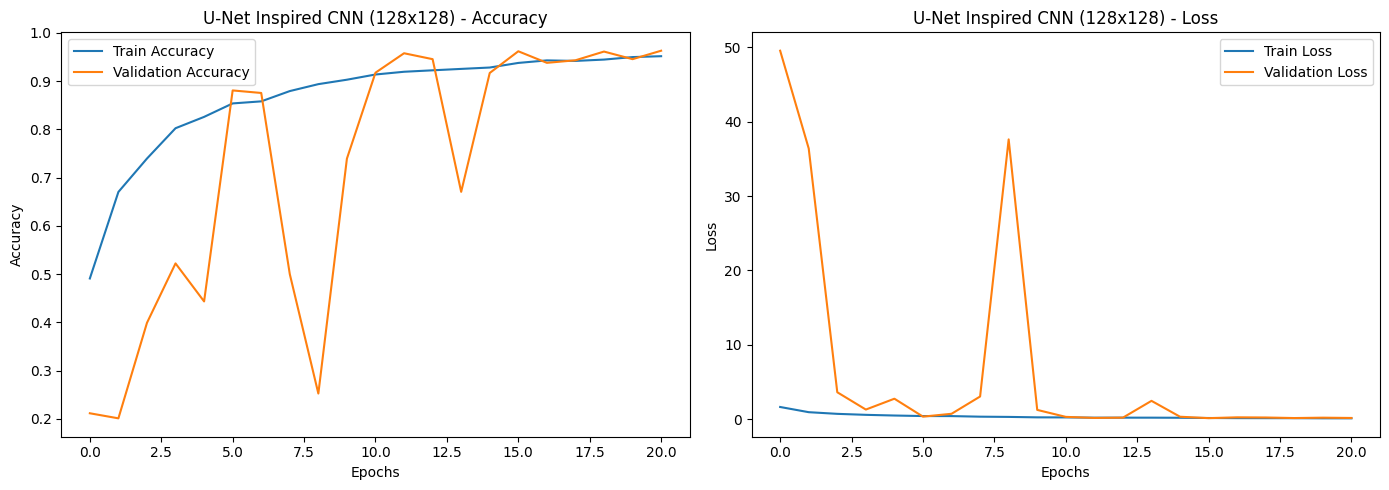

In [27]:
import matplotlib.pyplot as plt

def plot_training_history(history, title="U-Net Inspired CNN (128x128)"):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(14, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Train Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function with your model's training history
plot_training_history(history_simplified)


In [28]:
# Step 4: Evaluate + Plot Results
test_loss, test_acc = model_simplified.evaluate(X_test_128, y_test_128)
print(f"✅ Test Accuracy: {test_acc:.4f}")


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9554 - loss: 0.1693
✅ Test Accuracy: 0.9611


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       244
           1       1.00      1.00      1.00       624
           2       1.00      0.93      0.96       311
           3       0.94      0.89      0.92       579
           4       0.95      0.93      0.94       243
           5       0.87      0.98      0.92       284
           6       0.95      0.97      0.96       666
           7       1.00      1.00      1.00       470

    accuracy                           0.96      3421
   macro avg       0.96      0.96      0.96      3421
weighted avg       0.96      0.96      0.96      3421



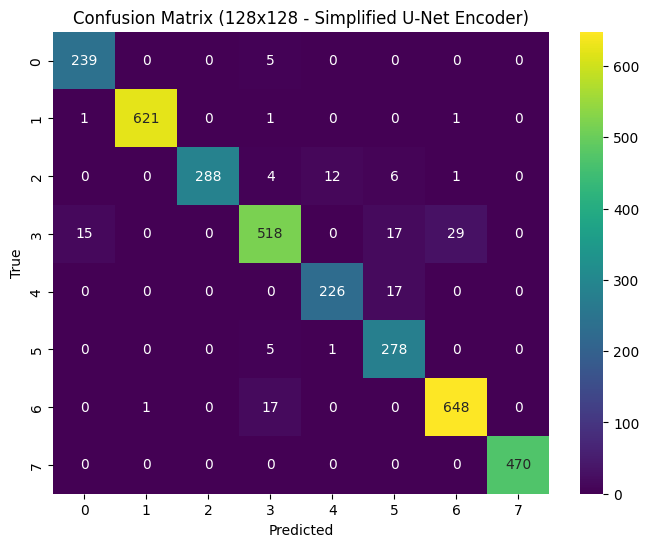

In [29]:
# Step 5: Report & Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model_simplified.predict(X_test_128).argmax(axis=1)

print("\nClassification Report:")
print(classification_report(y_test_128, y_pred))

conf_matrix = confusion_matrix(y_test_128, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis")
plt.title("Confusion Matrix (128x128 - Simplified U-Net Encoder)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


inception block

Epoch 1/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 43s 135ms/step - accuracy: 0.3518 - loss: 1.7728 - val_accuracy: 0.0835 - val_loss: 2.1795 - learning_rate: 1.0000e-04
Epoch 2/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.6901 - loss: 1.0516 - val_accuracy: 0.2301 - val_loss: 2.0517 - learning_rate: 1.0000e-04
Epoch 3/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.7981 - loss: 0.7279 - val_accuracy: 0.6641 - val_loss: 1.2301 - learning_rate: 1.0000e-04
Epoch 4/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.8373 - loss: 0.5435 - val_accuracy: 0.8914 - val_loss: 0.5355 - learning_rate: 1.0000e-04
Epoch 5/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.8718 - loss: 0.4490 - val_accuracy: 0.9095 - val_loss: 0.3667 - learning_rate: 1.0000e-04
Epoch 6/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.8887 - loss: 0.3836 - val_accuracy: 0.9206 - val_loss: 0.2920 - learning_rate: 1.0000e-04
Epoch 7/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - a

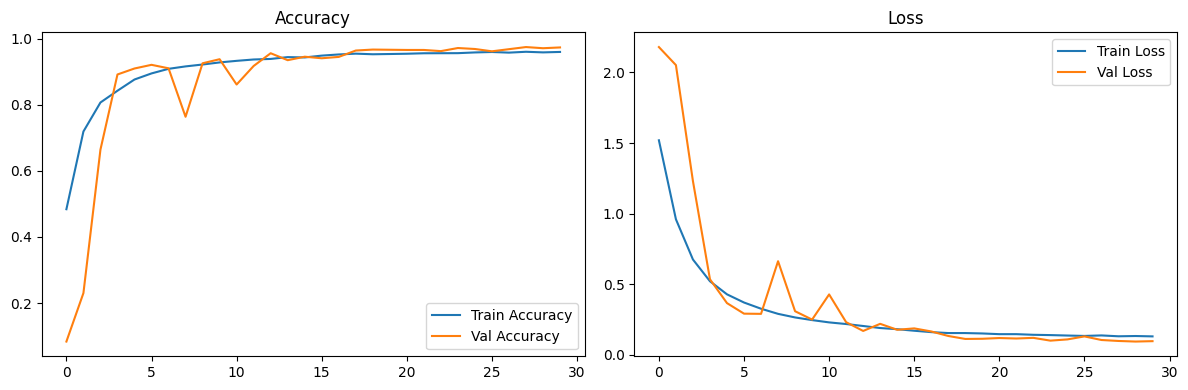

107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9742 - loss: 0.0965

✅ Test Accuracy: 0.9728
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       244
           1       1.00      1.00      1.00       624
           2       0.98      0.98      0.98       311
           3       0.92      0.94      0.93       579
           4       0.99      0.99      0.99       243
           5       0.99      0.95      0.97       284
           6       0.96      0.96      0.96       666
           7       1.00      1.00      1.00       470

    accuracy                           0.97      3421
   macro avg       0.98      0.97      0.97      3421
weighted avg       0.97      0.97      0.97      3421



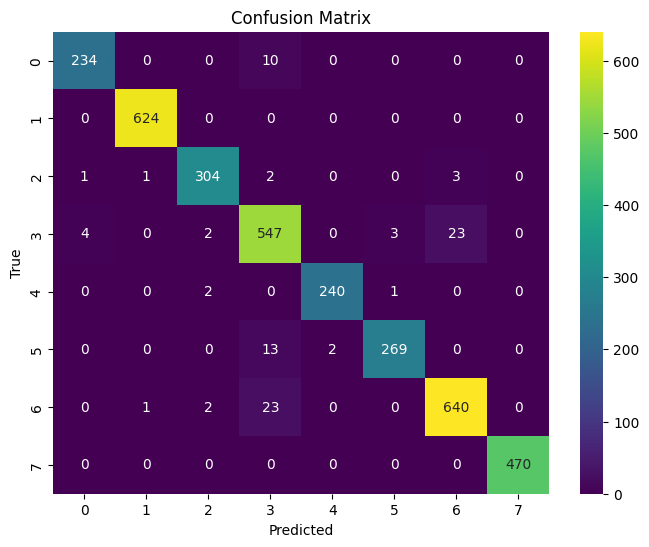

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight

# Load your dataset here
# Example:
# X_train_128, y_train_128 = ...
# X_val_128, y_val_128 = ...
# X_test_128, y_test_128 = ...

# 🧠 Inception Block
def inception_block(x, filters):
    f1, f3_in, f3_out, f5_in, f5_out, proj = filters

    path1 = layers.Conv2D(f1, (1, 1), padding='same', activation='relu')(x)
    path1 = layers.BatchNormalization()(path1)

    path2 = layers.Conv2D(f3_in, (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(f3_out, (3, 3), padding='same', activation='relu')(path2)
    path2 = layers.BatchNormalization()(path2)

    path3 = layers.Conv2D(f5_in, (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(f5_out, (5, 5), padding='same', activation='relu')(path3)
    path3 = layers.BatchNormalization()(path3)

    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(proj, (1, 1), padding='same', activation='relu')(path4)
    path4 = layers.BatchNormalization()(path4)

    return layers.concatenate([path1, path2, path3, path4], axis=-1)

# 🔧 Build Inception Model
def build_inception_cnn(input_shape=(128, 128, 3), num_classes=8):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D(2)(x)

    x = inception_block(x, [16, 16, 24, 4, 8, 8])
    x = layers.MaxPooling2D(2)(x)

    x = inception_block(x, [32, 32, 48, 8, 16, 16])
    x = layers.MaxPooling2D(2)(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# 🚀 Compile and Train
model = build_inception_cnn()
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

early_stop = callbacks.EarlyStopping(patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)


history = model.fit(
    X_train_128, y_train_128,
    validation_data=(X_val_128, y_val_128),
    epochs=30,
    batch_size=64,
    callbacks=[early_stop, lr_scheduler]
)


# 📈 Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()

# 🎯 Evaluate
test_loss, test_acc = model.evaluate(X_test_128, y_test_128)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# 🔍 Classification Report & Confusion Matrix
y_pred = model.predict(X_test_128).argmax(axis=1)
print(classification_report(y_test_128, y_pred))

conf_matrix = confusion_matrix(y_test_128, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# Skip connection

In [33]:
def build_skip_connection_cnn(input_shape=(128, 128, 3), num_classes=8):
    inputs = layers.Input(shape=input_shape)

    x1 = layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)
    x1 = layers.BatchNormalization()(x1)
    x1 = layers.Conv2D(32, 3, padding='same', activation='relu')(x1)
    x1 = layers.BatchNormalization()(x1)
    p1 = layers.MaxPooling2D(2)(x1)  # (64, 64, 32)

    x2 = layers.Conv2D(64, 3, padding='same', activation='relu')(p1)
    x2 = layers.BatchNormalization()(x2)
    x2 = layers.Conv2D(64, 3, padding='same', activation='relu')(x2)
    x2 = layers.BatchNormalization()(x2)

    # Match p1's channels to x2's using a 1x1 Conv2D
    p1_proj = layers.Conv2D(64, (1, 1), padding='same')(p1)
    skip1 = layers.add([p1_proj, x2])
    p2 = layers.MaxPooling2D(2)(skip1)  # (32, 32, 64)

    x3 = layers.Conv2D(128, 3, padding='same', activation='relu')(p2)
    x3 = layers.BatchNormalization()(x3)
    x3 = layers.Conv2D(128, 3, padding='same', activation='relu')(x3)
    x3 = layers.BatchNormalization()(x3)

    # Match p2's channels to x3's
    p2_proj = layers.Conv2D(128, (1, 1), padding='same')(p2)
    skip2 = layers.add([p2_proj, x3])

    x = layers.GlobalAveragePooling2D()(skip2)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model


In [ ]:
from tensorflow.keras import optimizers

model_skip = build_skip_connection_cnn()
optimizer = optimizers.Adam(learning_rate=1e-4)
model_skip.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = callbacks.EarlyStopping(patience=5, restore_best_weights=True)
lr_scheduler = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_128), y=y_train_128)
class_weights_dict = {i: w for i, w in enumerate(class_weights)}

# Train
history_skip = model_skip.fit(
    X_train_128, y_train_128,
    validation_data=(X_val_128, y_val_128),
    epochs=30,
    batch_size=64,
    callbacks=[early_stop, lr_scheduler],
    class_weight=class_weights_dict
)


Epoch 1/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 44s 153ms/step - accuracy: 0.5924 - loss: 1.2511 - val_accuracy: 0.1373 - val_loss: 3.7677 - learning_rate: 1.0000e-04
Epoch 2/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8811 - loss: 0.4184

In [ ]:
# Accuracy and loss
test_loss, test_acc = model_skip.evaluate(X_test_128, y_test_128)
print(f"✅ Test Accuracy: {test_acc:.4f}")

# Classification report
y_pred = model_skip.predict(X_test_128).argmax(axis=1)
print("\nClassification Report:")
print(classification_report(y_test_128, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test_128, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Plot history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_skip.history['accuracy'], label='Train Accuracy')
plt.plot(history_skip.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_skip.history['loss'], label='Train Loss')
plt.plot(history_skip.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()
